## Observations and Insights

## Dependencies and starter code

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()
study_results.head()
merged_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_df=merged_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_df=merged_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
std_df=merged_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
variance_df=merged_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sem_df=merged_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_df.head()

tumor_volume_df=pd.DataFrame({
                             "Mean Tumor Volume":mean_df,
                             "Median Tumor Volume":median_df,
                             "Standard Deviation Tumor Volume":std_df,
                             "Variance Tumor Volume":variance_df,
                             "SEM Tumor Volume":sem_df})

tumor_volume_df.head()






,Mean Tumor Volume,Median Tumor Volume,Standard Deviation Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

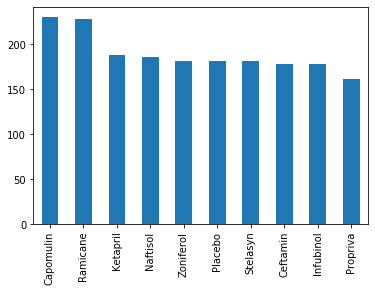

In [91]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_data_points=merged_data["Drug Regimen"].value_counts()
pandas_bar=number_data_points.plot.bar()
pandas_bar

<BarContainer object of 10 artists>

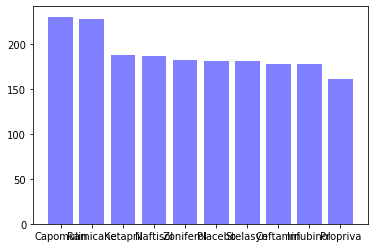

In [92]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


data_per_treatment=[230,228,188,186,182,181,181,178,178,161]
x_axis=np.arange(len(data_per_treatment))
bar_pyplot=plt.bar(x_axis,data_per_treatment,color="b",alpha=.5,align="center")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"])
bar_pyplot



## Pie plots

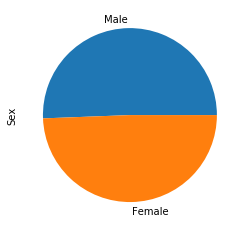

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=merged_data["Sex"].value_counts()
pie_plot=gender.plot.pie()
pie_plot

([<matplotlib.patches.Wedge at 0x1a26475e90>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

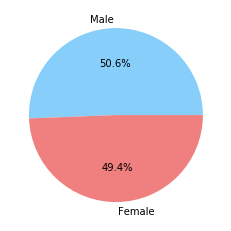

In [94]:
labels=["Male","Female"]
sizes=[958,935]
colors=["lightskyblue","lightcoral"]
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

ftv_db=merged_data


ftv_db
timepoint45= ftv_db.loc[ftv_db["Timepoint"] == 45, :]

timepoint45.head(25)

quartiles=timepoint45["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(iqr)

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

28.211951665000008
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


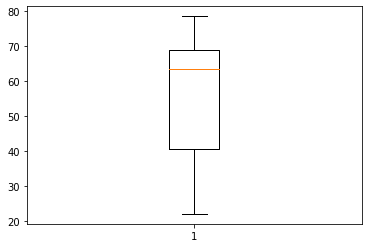

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot(timepoint45["Tumor Volume (mm3)"])
plt.show()

## Line and scatter plots

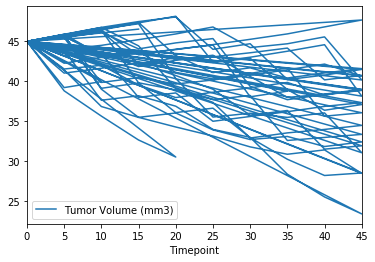

In [97]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin=ftv_db.loc[ftv_db["Drug Regimen"] == "Capomulin", :]
tpvtv=capomulin[["Timepoint","Tumor Volume (mm3)"]]
new_index=tpvtv.set_index("Timepoint")
new_index.head()

new_index.plot.line()

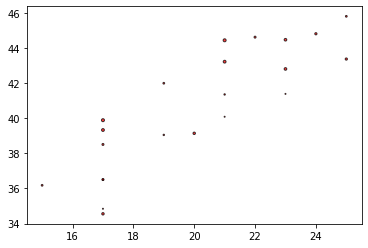

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
new_merged_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
capomulin2=new_merged_data.loc[new_merged_data["Drug Regimen"] == "Capomulin", :]
average_tumor_volume=capomulin2["Tumor Volume (mm3)"].mean()

wght=capomulin2.groupby("Mouse ID").mean()

plt.scatter(wght["Weight (g)"],wght["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

In [99]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [100]:
correlation = st.pearsonr(wght["Weight (g)"],wght["Tumor Volume (mm3)"])
new_core=round(correlation[0],2)
print(new_core)

0.84


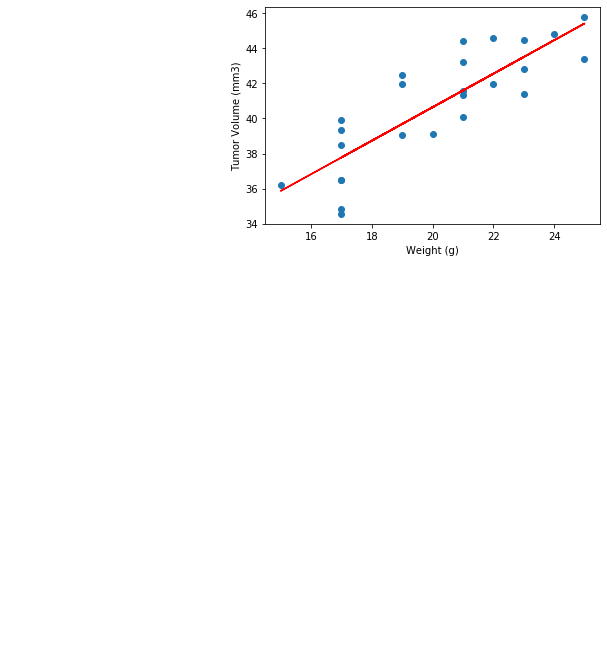

In [103]:
x_values = wght["Weight (g)"]
y_values = wght["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
